<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
<div hidden>
    $$
    \newcommand{\reals}{\mathbb{R}}
    \newcommand{\naturals}{\mathbb{N}}
    \newcommand{\integers}{\mathbb{Z}}
    \newcommand{\prob}{\mathbb{P}}
    \newcommand{\expect}{\mathbb{E}}
    \newcommand{\b}[1]{\mathbf{#1}}
    \newcommand{\bs}[1]{\boldsymbol{#1}}
    \newcommand{\c}[1]{\mathcal{#1}}
    \newcommand{mat}[2]{\left[\,\begin{array}{#1}#2\end{array}\,\right]}
    $$
</div>

# COMPSCI 371 Homework 0

_**Group Members:**_

### Problem 0 (3 points)

## Part 1: Linear Algebra 

### Problem 1.1

### Problem 1.2

### Problem 1.3

### Problem 1.4

In [36]:
import urllib.request
import ssl
from os import path as osp
import shutil


def retrieve(file_name, semester='fall24', homework=0):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        context = ssl._create_unverified_context()
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci371/homework/{}/{}'
        url = fmt.format(semester, homework, file_name)
        with urllib.request.urlopen(url, context=context) as response:
            with open(file_name, 'wb') as file:
                shutil.copyfileobj(response, file)
        print('Downloaded file {}'.format(file_name))

In [37]:
import pickle

# retrieve is defined in a hidden cell
file_name = 'points.pkl'
retrieve(file_name)
with open(file_name, 'rb') as file:
    t = pickle.load(file)

Using previously downloaded file points.pkl


In [60]:
import numpy as np
import math
def create_mat(x, q):
    n = len(x)
    m = 2*q + 1
    a = np.zeros((n, m))
    a[:, 0] = 1
    for k in range(1, q+1):
        a[:, k] = np.cos(2*math.pi * k * x)
    for k in range(q, 2*q):
        a[:, k+1] = np.sin(2 * np.pi * (k - q) * x) 
    return a

In [61]:

def fit(x, y, q):
    A = create_mat(x, q)
    
    coefs, res, rank, s = np.linalg.lstsq(A, y)
    vals = A @ coefs
    
    return vals

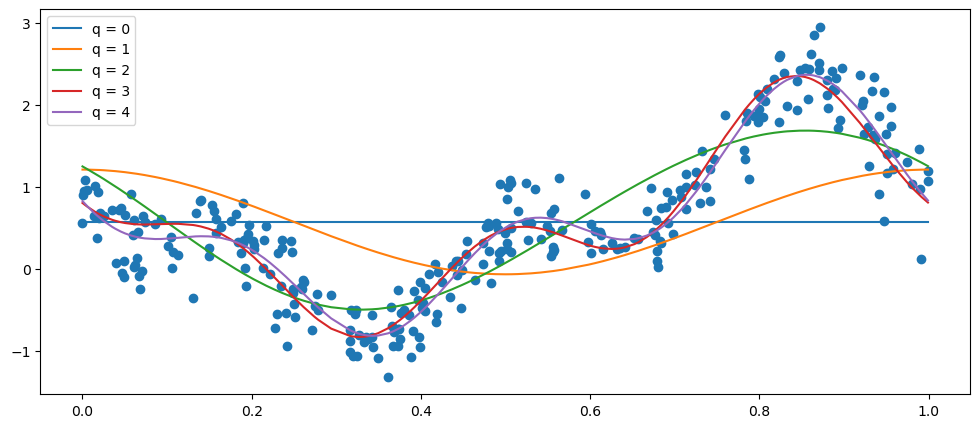

In [68]:

plt.figure(figsize=(12, 5))
plt.scatter(t.x, t.y)

for q in range(5):
    A = create_mat(t.x, q)
    
    vals = fit(t.x, t.y, q)
    
    
    i = np.argsort(t.x)
    x = t.x[i]
    vals = vals[i]


    plt.plot(x, vals, label=f"q = {q}")

plt.legend()
plt.show()



## Part 2: Probability

### Problem 2.1

### Problem 2.2

### Problem 2.3

## Part 3: Geometry

### Problem 3.1

In [69]:
# retrieve is defined in a hidden cell
file_name = 'lines.pkl'
retrieve(file_name)
with open(file_name, 'rb') as file:
    lines = pickle.load(file)

Using previously downloaded file lines.pkl


In [86]:
print(lines[2].A.shape)
print(lines[2].b.shape)

(2, 3)
(2,)


In [102]:
import numpy
import scipy

def para(a, b):
    b = b.reshape(-1,1)
    p = scipy.linalg.lstsq(a, b)[0]
    p = p.flatten()
    n = scipy.linalg.null_space(a)
    # print(n.shape)
    n = n.flatten()
    # print(n.shape)
    n = n / scipy.linalg.norm(n)

    return p, n



# para(lines[0].A, lines[0].b)

(array([0., 0., 0.]), array([0., 0., 1.]))

In [112]:
for line in lines:
    A = line.A
    b = line.b
    p, n = para(A, b)

    res0 = scipy.linalg.norm(A @ (p + 0*n) - b)
    res2 = scipy.linalg.norm(A @ (p + 2*n) - b)
    p = p.round(3)
    n = n.round(3)
    res0 = round(res0, 3)
    res2 = round(res2, 3)
    print(f"p = {p}, n = {n}, r = [{res0}, {res2}]")

p = [0. 0. 0.], n = [0. 0. 1.], r = [0.0, 0.0]
p = [ 0.  5. -2.], n = [1. 0. 0.], r = [0.0, 0.0]
p = [2.213 0.173 3.133], n = [-0.808 -0.115  0.577], r = [0.0, 0.0]


## Part 4: Calculus

### Problem 4.1